# 正準相関分析 （Wine Quality）

[Wine Data](https://archive.ics.uci.edu/dataset/109/wine)

In [45]:
!pip install ucimlrepo

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA

In [47]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

print(X.shape)
print(y.shape)

ConnectionError: Error connecting to server

In [21]:

print(np.max(y), np.min(y))
# One hot encoding
n_labels = len(np.unique(y))
print(n_labels)
Y = np.eye(n_labels)[y-3].reshape((len(y), n_labels))

print(Y)

9 3
7
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
df_color = pd.get_dummies(wine_quality.data.original['color'], dtype=int)

print(df_color.values)


[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [23]:
Y = np.concatenate((Y, df_color.values), axis=1)

print(Y)

[[0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


CCA

In [24]:
# Canonical Correlation Analysis (CCA)

cca = CCA(n_components=2)
cca.fit(X, Y)
X_r, Y_r = cca.transform(X, Y)

print('the coefficient of determination R^2 =', cca.score(X, Y))

the coefficient of determination R^2 = 0.1930389099688713


In [60]:
import matplotlib.colors as mcolors

#colors = list(mcolors.XKCD_COLORS)
#colors = list(mcolors.CSS4_COLORS)

colors = ['blue', 'gray', 'aquamarine', 'lightgreen', 'orange', 'violet', 'red']
print(colors)

['blue', 'gray', 'aquamarine', 'lightgreen', 'orange', 'violet', 'red']


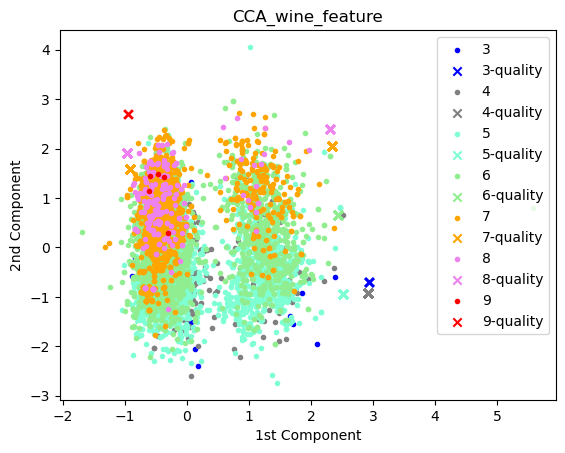

In [61]:

## plot
plt.figure()
for i  in range(n_labels):
    plt.scatter(X_r[y.values.reshape(len(y)) == i + 3, 0], X_r[y.values.reshape(len(y)) == i + 3, 1], c=colors[i], marker='.', label=str(i+3))
    plt.scatter(Y_r[y.values.reshape(len(y)) == i + 3, 0], Y_r[y.values.reshape(len(y)) == i + 3, 1], c=colors[i], marker='x', label=str(i+3)+'-quality')
#plt.scatter(X_r[:, 0], X_r[:, 1], marker='.')
#plt.scatter(Y_r[:, 0], Y_r[:, 1], marker='x')
    
plt.legend()
plt.title('CCA_wine_feature')
plt.xlabel('1st Component')
plt.ylabel('2nd Component')
plt.savefig('CCA_wine_feature.png')
plt.show()